# Pré-processamento

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
passageiros = pd.read_csv('passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

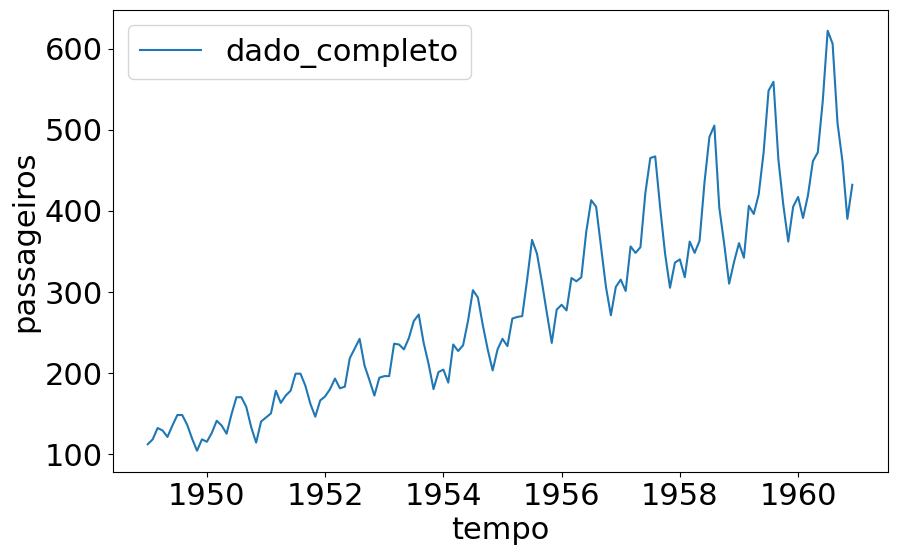

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [5]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [6]:
dado_escalado = sc.transform(passageiros)

In [7]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<Axes: xlabel='data', ylabel='passageiros'>

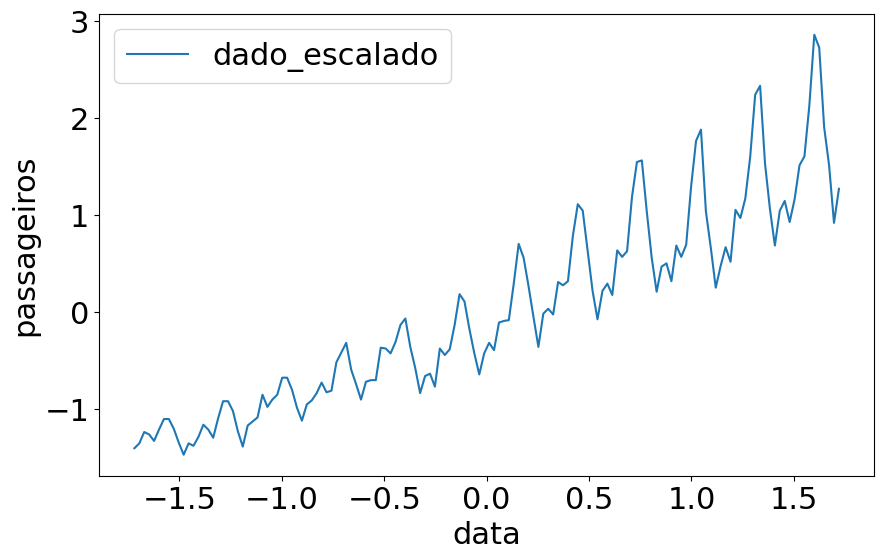

In [8]:
plt.xlabel('data')
plt.ylabel('passageiros')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [9]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [10]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [11]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

<Axes: xlabel='data', ylabel='passageiros'>

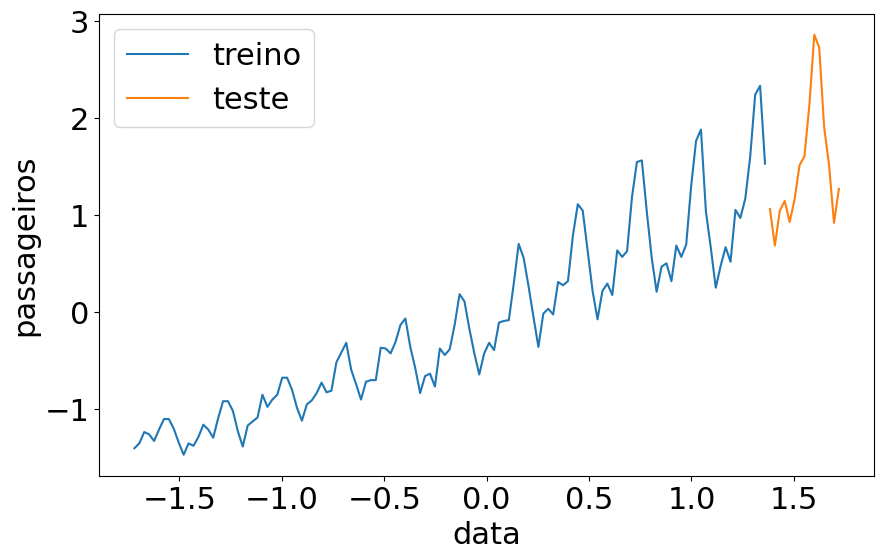

In [12]:
plt.xlabel('data')
plt.ylabel('passageiros')
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')

# 02.Regressão

$ z = Wx + b $

$ a(z) = Cz $

In [13]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-29 15:52:43.023766: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [14]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
regressor.fit(x_treino, y_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1422  


In [17]:
y_predict = regressor.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: >

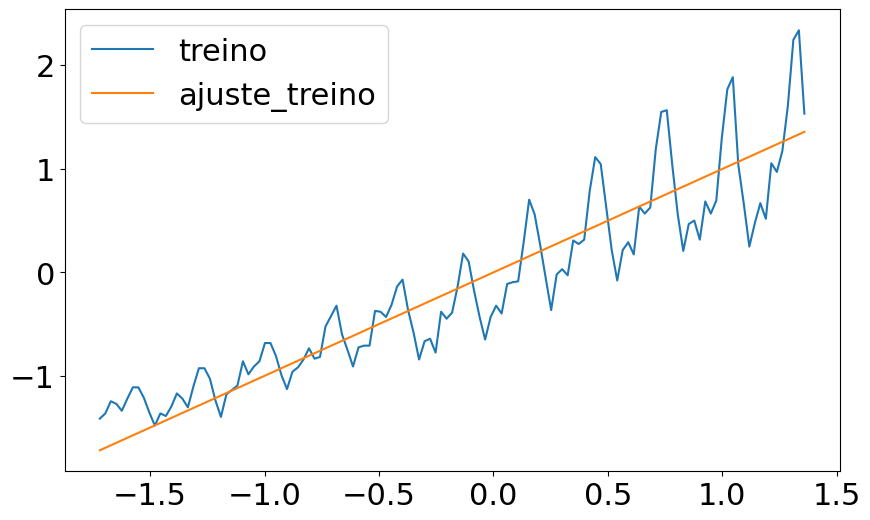

In [18]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')

In [19]:
d = {'tempo': x_treino, 'passageiros': y_predict[:,0]}

In [20]:
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.712585
1,-1.696007,-1.688633
2,-1.671950,-1.664680
3,-1.647894,-1.640728
4,-1.623837,-1.616776
...,...,...
124,1.262984,1.257492
125,1.287041,1.281445
126,1.311098,1.305397
127,1.335155,1.329349


In [21]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

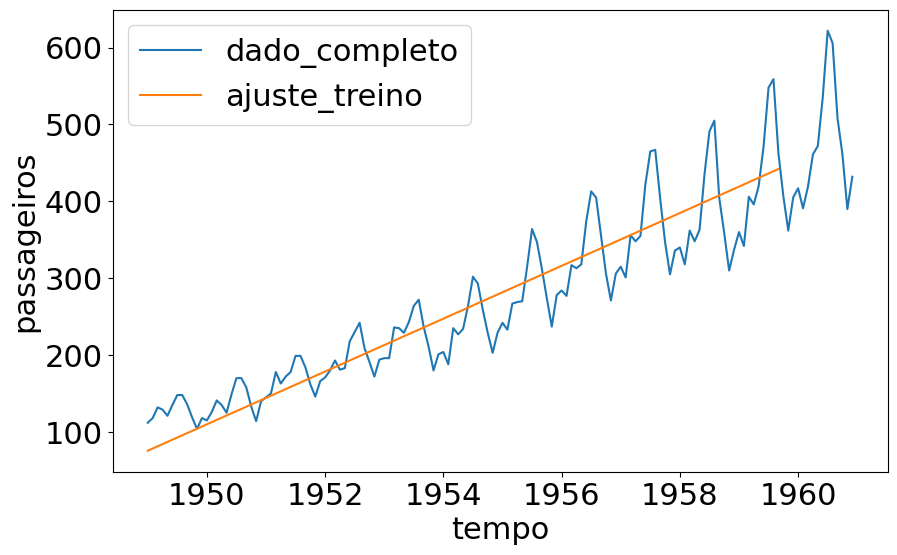

In [22]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [23]:
y_predict_teste = regressor.predict(x_teste)
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

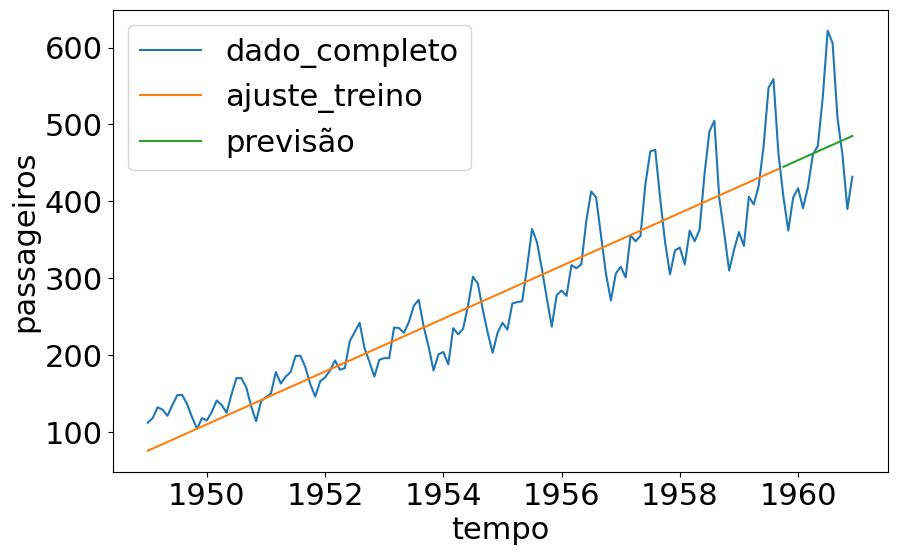

In [24]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [25]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor2.fit(x_treino, y_treino, epochs=500)

In [27]:
y_predict = regressor2.predict(x_treino)
y_predict_teste = regressor2.predict(x_teste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<Axes: >

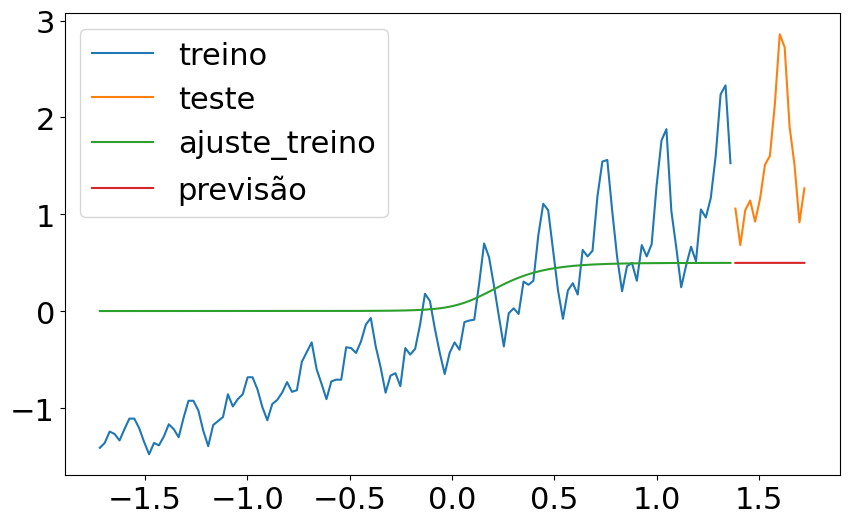

In [28]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label='previsão')

$\Huge \sigma(z) = \frac{1}{1+e^{-z}} $

## Atualização do pesos

No vídeo anterior utilizamos o otimizador Adam para ser responsável pela atualização dos pesos. Este algoritmo é exemplo de um método de gradiente descendente estocástico desenvolvido para ser computacionalmente eficiente.
[Neste texto](https://cursos.alura.com.br/course/rede-neural-numpy/task/57827) eu explico como um algoritmo de gradiente descendente simples funciona.

Em conjunto com o algoritmo de otimização precisamos utilizar uma função de custo que vai medir quanto a nossa estimativa é diferente do valor conhecido. O algoritmo de otimização busca minimizar o valor da função de custo. No problema estudado no curso estamos estimando o número de passageiros. Para minimizar a função de custo, o número de passageiros estimado deve ser o mais próximo possível do número de passageiros presentes nos dados de treino.

[Neste link](https://www.tensorflow.org/api_docs/python/tf/keras/losses) você encontra diferentes funções de custo presentes no Keras. A função de custo de erro médio quadrático é uma das que é adequada para problemas de regressão.

# 03.Reformulando o problema

In [29]:
vetor = pd.DataFrame(y_treino)[0]

In [39]:
def separa_dados(vetor: pd.DataFrame, n_passos: int):
    x_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i - n_passos: i - 1]))
        y_novo.append(vetor.loc[i])
    
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [40]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [41]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [42]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [44]:
vetor2 = pd.DataFrame(y_teste)[0]
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [ ]:
regressor3 = Sequential([
    Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

In [47]:
y_predict_novo = regressor3.predict(x_treino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


<Axes: xlabel='tempo', ylabel='0'>

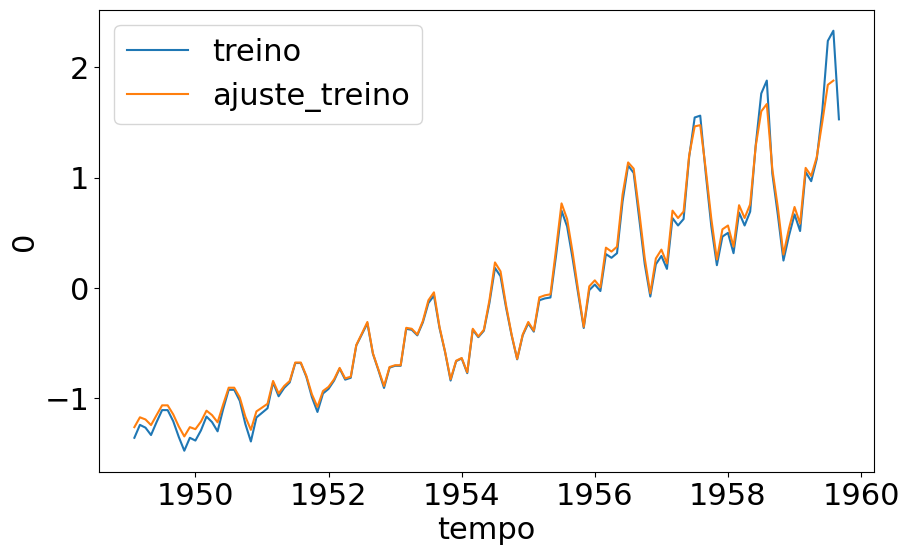

In [48]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.dataframe(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [49]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<Axes: xlabel='tempo', ylabel='0'>

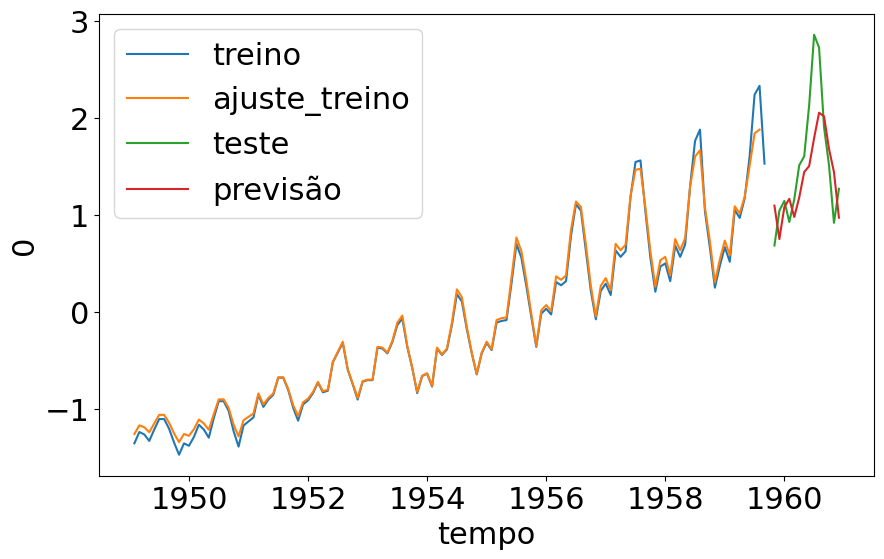

In [58]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_teste_novo)[0].values, data=passageiros[130:144], label='previsão')

In [59]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [60]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [61]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [62]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [ ]:
regressor4 = Sequential([
    Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

regressor4.compile(loss='mean_squared_error', optimizer='adam')

regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

In [65]:
y_predict_novo = regressor4.predict(x_treino_novo)
y_predict_teste_novo = regressor4.predict(x_teste_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [66]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

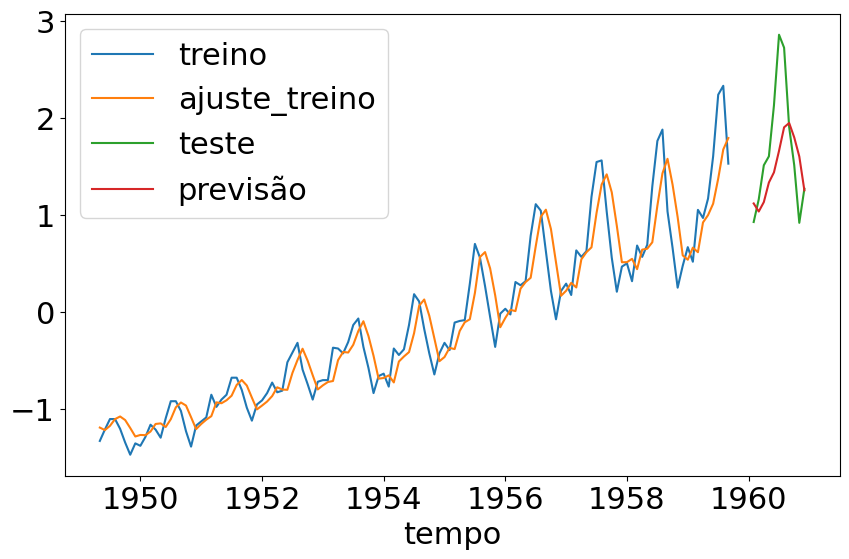

In [71]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

# 04.Redes recorrentes

In [73]:
bicicletas = pd.read_csv('bicicletas.csv')
bicicletas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [75]:
bicicletas['datas'] = pd.to_datetime(bicicletas['datas'])

<Axes: xlabel='datas', ylabel='contagem'>

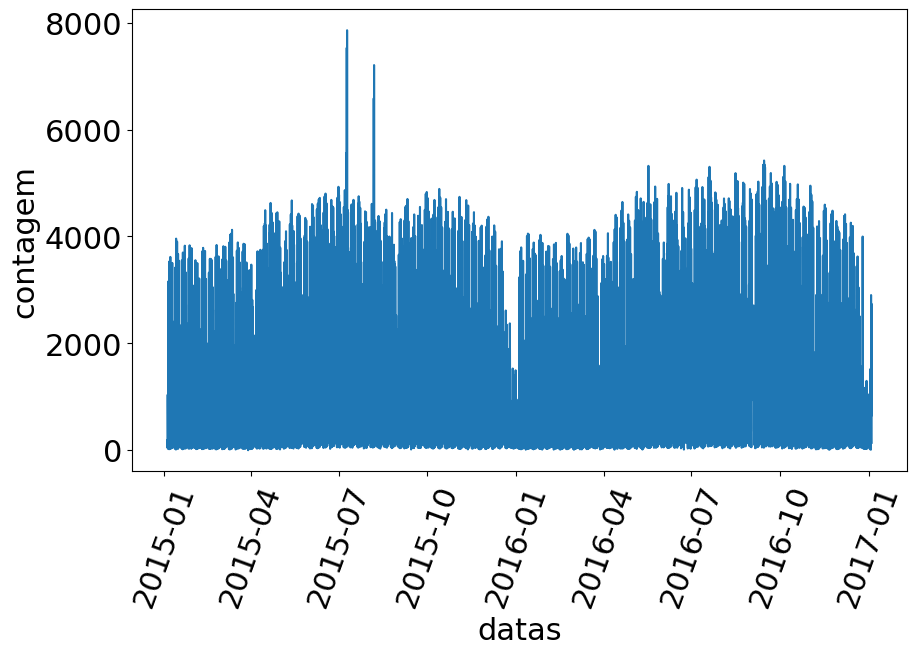

In [77]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y='contagem', data=bicicletas)

In [78]:
sc2 = StandardScaler()
sc2.fit(bicicletas['contagem'].values.reshape(-1,1))

StandardScaler()

In [79]:
y = sc2.transform(bicicletas['contagem'].values.reshape(-1,1))

In [80]:
tamanho_treino = int(len(bicicletas) * 0.9)
tamanho_teste = len(bicicletas) - tamanho_treino

In [81]:
y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino:len(bicicletas)]

<Axes: xlabel='datas'>

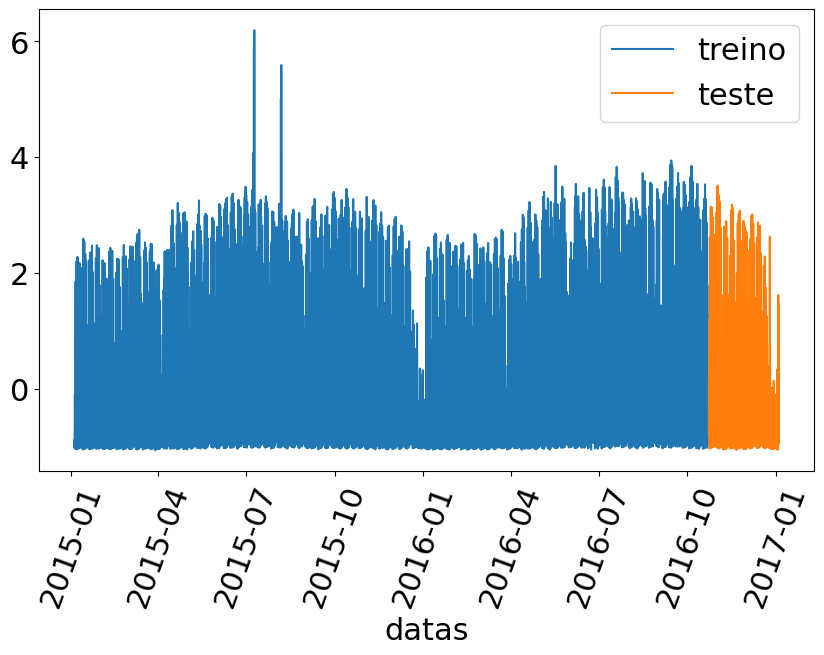

In [83]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_treino[:,0], data=bicicletas[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_teste[:,0], data=bicicletas[tamanho_treino:len(bicicletas)], label='teste')

In [84]:
vetor = pd.DataFrame(y_treino)[0]
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [86]:
vetor2 = pd.DataFrame(y_teste)[0]
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [87]:
x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0], x_treino_novo.shape[1], 1))
x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

In [91]:
recorrente = Sequential([
    LSTM(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])),
    Dense(units=1)
])

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente.summary()

/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_Previsao_com_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

#### LSTM = Long Short Term Memory

[O que é uma LSTM?](https://cursos.alura.com.br/course/deep-learning-previsao-keras/task/78455)

# 05.Avaliando o resultado

In [92]:
resultado = recorrente.fit(x_treino_novo, y_treino_novo,
                           validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5063 - val_loss: 0.0787
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1038 - val_loss: 0.0587
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0616 - val_loss: 0.0376
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0485 - val_loss: 0.0294
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0411 - val_loss: 0.0400
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0412 - val_loss: 0.0260
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0422 - val_loss: 0.0264
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0367 - val_loss: 0.0244
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0335 - val_loss: 0.0222
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0337 - val_loss: 0.0269
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0315 - val_loss: 0.0241
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━

In [93]:
y_ajustado = recorrente.predict(x_treino_novo)

490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: xlabel='datas'>

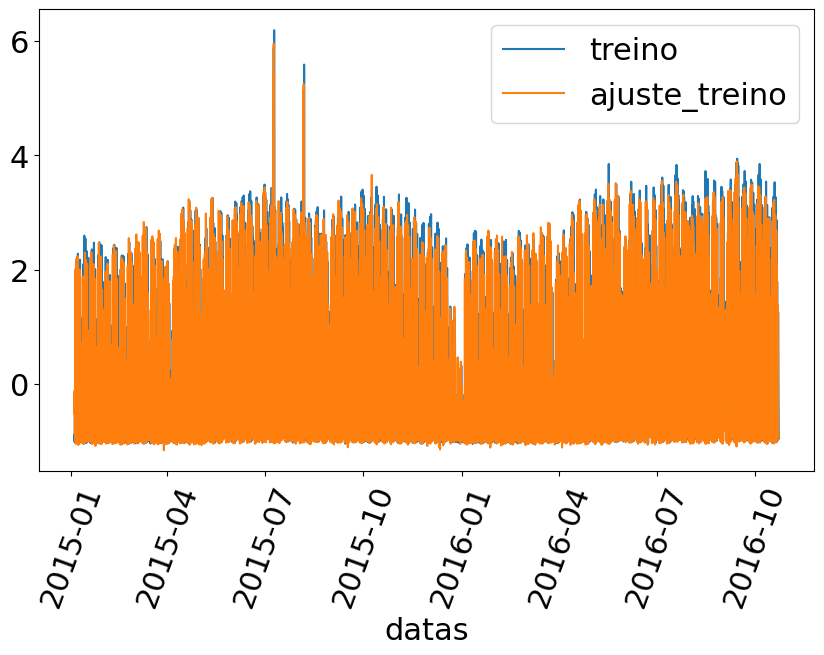

In [95]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_treino[:,0], data=bicicletas[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bicicletas[0:15662], label='ajuste_treino')

In [96]:
y_predito = recorrente.predict(x_teste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: xlabel='datas'>

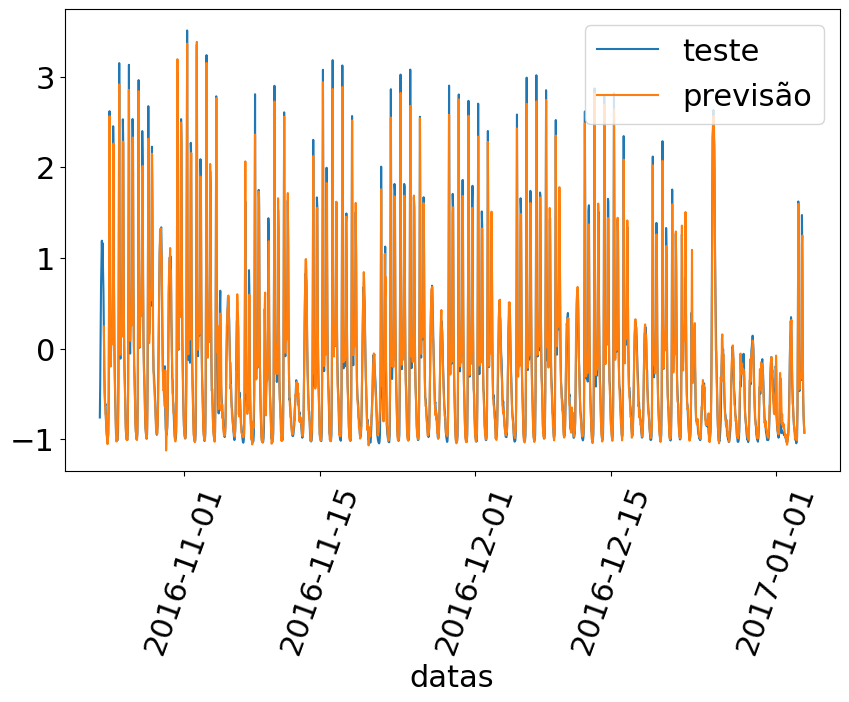

In [101]:
plt.xticks(rotation=70)
sns.lineplot(x='datas', y=y_teste[:,0], data=bicicletas[tamanho_treino:len(bicicletas)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bicicletas[tamanho_treino + 10:len(bicicletas)], label='previsão')